In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

In [70]:
df=pd.read_csv("/kaggle/input/delhi-weather-data/testset.csv")
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [71]:
df.columns=df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


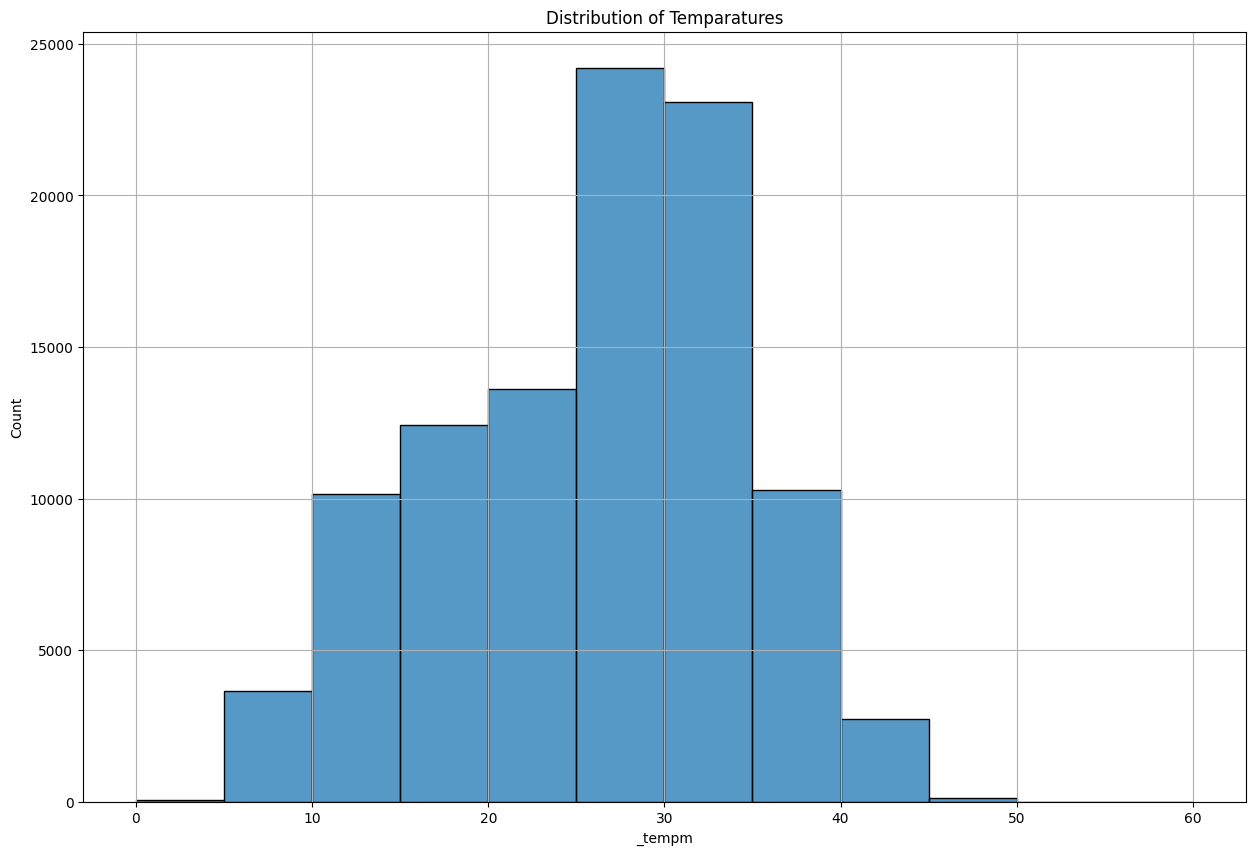

In [72]:
plt.figure(figsize=(15,10))
sns.histplot(df._tempm,bins=[i for i in range(0,61,5)],kde=False)
plt.title('Distribution of Temparatures')
plt.grid()
plt.show()

In [73]:
df.index=pd.to_datetime(df.datetime_utc)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [74]:
required_col = ['_dewptm', '_fog', '_hail', '_hum', '_rain', '_snow', '_tempm', '_thunder', '_tornado']

df = df[required_col]
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [75]:
df.isna().sum()

_dewptm     621
_fog          0
_hail         0
_hum        757
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [76]:
df = df.ffill()
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [77]:
df.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [78]:
df_final=df.resample('D').mean() #D-day value
df_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [79]:
df_final.isna().sum()

_dewptm     141
_fog        141
_hail       141
_hum        141
_rain       141
_snow       141
_tempm      141
_thunder    141
_tornado    141
dtype: int64

In [80]:
df_final = df_final.ffill()
df_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [81]:
df_final.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [82]:
df_final.head(12)

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0
1996-11-06,9.062500,0.0,0.0,47.875000,0.0,0.0,21.937500,0.0,0.0
1996-11-07,9.458333,0.0,0.0,48.000000,0.0,0.0,21.750000,0.0,0.0
1996-11-08,8.083333,0.0,0.0,45.791667,0.0,0.0,21.000000,0.0,0.0
1996-11-09,7.772727,0.0,0.0,47.181818,0.0,0.0,19.909091,0.0,0.0


In [83]:
from sklearn.preprocessing import MinMaxScaler

#normailze
scaler=MinMaxScaler()
scaler_data=scaler.fit_transform(df_final)

sequence_length=10
num_features=len(df_final.columns)

sequences=[]
labels=[]

for i in range(len(scaler_data)-sequence_length):
    seq=scaler_data[i:i+sequence_length]
    label=scaler_data[i+sequence_length][6] #[6]-->"_tempm" columns index
    sequences.append(seq)
    labels.append(label)

#concvering to numpy array
sequences=np.array(sequences)
labels=np.array(labels)

train_size=int(0.8* len(sequences))
x_train,x_test=sequences[:train_size],sequences[train_size:]
y_train,y_test=labels[:train_size],labels[train_size:]

print("X TRAIN SHAPE : ",x_train.shape)
print("X TEST SHAPE : ",x_test.shape)
print("Y TRAIN SHAPE : ",y_train.shape)
print("Y TEST SHAPE : ",y_test.shape)


X TRAIN SHAPE :  (5976, 10, 9)
X TEST SHAPE :  (1494, 10, 9)
Y TRAIN SHAPE :  (5976,)
Y TEST SHAPE :  (1494,)


In [85]:
#LSTM MODEL
model = Sequential()
model.add(Input(shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

#Compile 
model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,513 (517.63 KB)

 Trainable params: 132,513 (517.63 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0

In [93]:
#evaluate
import tensorflow as tf
best_model=tf.keras.models.load_model('best_model.keras')
test_loss = best_model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 
Test Loss: 0.0019392316462472081


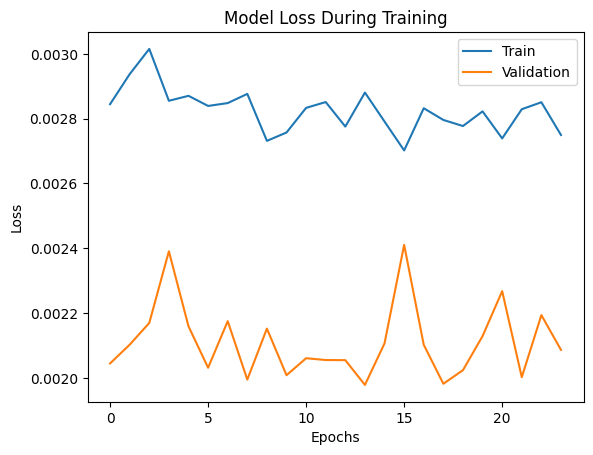

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Train","Validation"],loc='upper right')

# Show plot
plt.show()

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

predictions=best_model.predict(x_test)

mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)

print("Mean Absolute Error",mae)
print("Mean Squared Eroor", mse)
print("root MEan Squared Error", rmse)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error 0.033872178367352374
Mean Squared Eroor 0.00193923128998697
root MEan Squared Error 0.04403670389557977


In [111]:
#y_true values
y_test_copies = np.repeat(y_test.reshape(-1, 1), x_test.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(y_test_copies)[:,6]

#predicted
prediction = best_model.predict(x_test)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


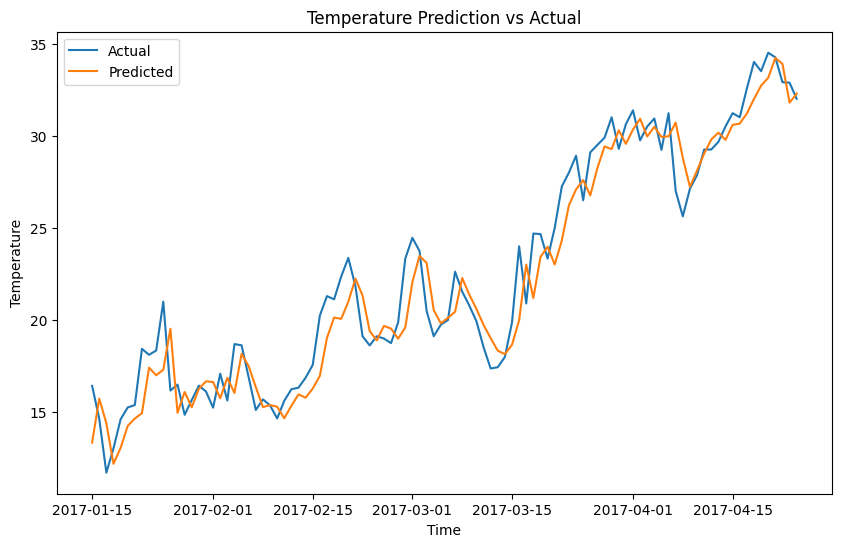

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

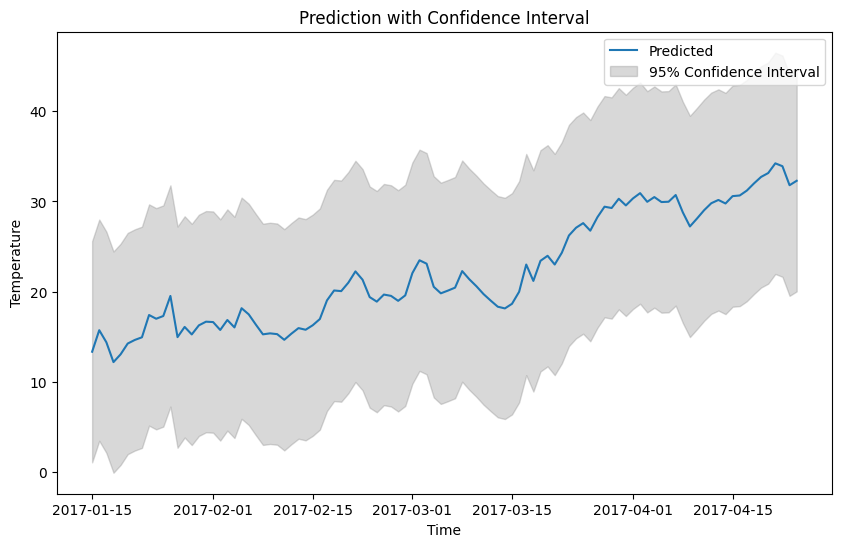

In [120]:
lower_bound = predicted_temp[-100:] - 2 * np.std(predicted_temp[-100:])
upper_bound = predicted_temp[-100:] + 2 * np.std(predicted_temp[-100:])

plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.fill_between(df_final.index[-100:], lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title('Prediction with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

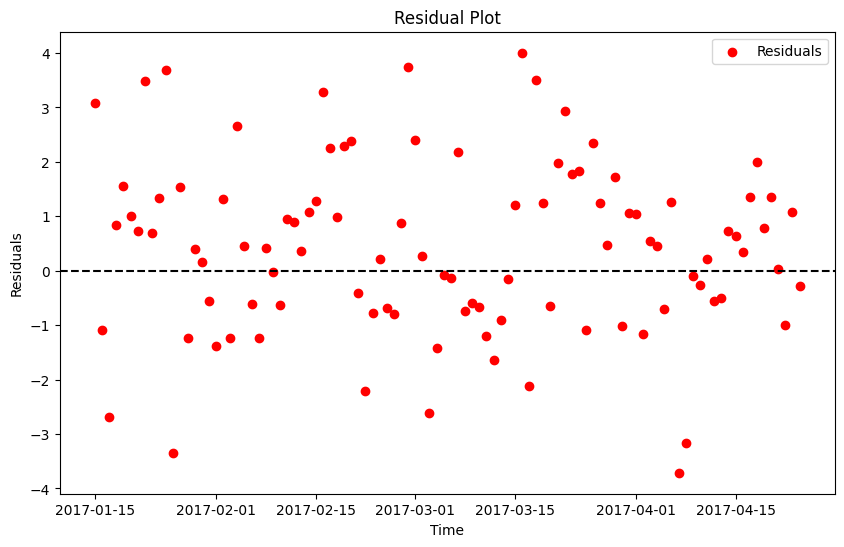

In [121]:
#Residuals
residuals = true_temp[-100:] - predicted_temp[-100:]
plt.figure(figsize=(10, 6))
plt.scatter(df_final.index[-100:], residuals, color='red', label='Residuals')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at zero
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()